# Open CV


In [ ]:
pip install opencv-python-contrib

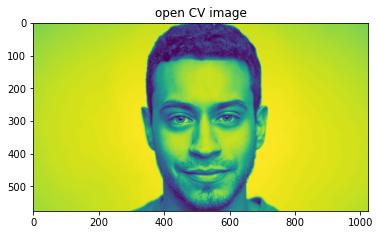

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('images/sampleimage.jpeg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray)
plt.title("open CV image")
plt.show()

## Cascade Classifier

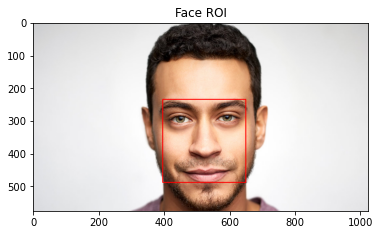

In [12]:
face_cascade = cv2.CascadeClassifier('classifiers/lbpcascade_frontalface_improved.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
    rgb = cv2.rectangle(rgb,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(rgb)
plt.title("Face ROI")
plt.show()

## DLIB Demo

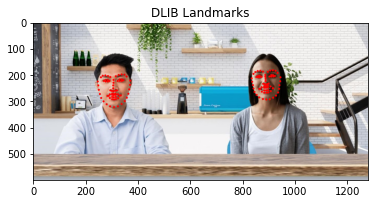

In [18]:
import dlib

detector = dlib.get_frontal_face_detector()#haar casscade
predictor = dlib.shape_predictor("classifiers/shape_predictor_68_face_landmarks.dat")


image = cv2.imread('images/image3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# detect faces in the grayscale image
faces = detector(gray, 1)

for face in faces:

    landmarks = predictor(gray, face)
    list = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(rgb, (x, y), 1, (255, 0, 0), thickness=5)  # For each point, draw a red circle with thickness2 on the original frame

        list.append((x, y))

plt.imshow(rgb)
plt.title("DLIB Landmarks")
plt.show()

## Live DLIB

In [28]:
import ipywidgets as widgets
import imutils
import threading
from IPython.display import display, Image


stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', 
    tooltip='Push to Stop Webcam',
    icon='square' 
)



def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        
        #frame = imutils.resize(frame, width=200)
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = detector(gray, 1)

        for face in faces:

            landmarks = predictor(gray, face)
            list = []
            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y

                cv2.circle(frame, (x, y), 1, (0, 0, 255), thickness=3)  # For each point, draw a red circle with thickness2 on the original frame

                list.append((x, y))
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            

display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Push to Stop Webc…

None

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/inclassEnv/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/inclassEnv/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-25-657b62080bac>", line 27, in view
    frame = imutils.resize(frame, width=100)
  File "/opt/anaconda3/envs/inclassEnv/lib/python3.7/site-packages/imutils/convenience.py", line 69, in resize
    (h, w) = image.shape[:2]
AttributeError: 'NoneType' object has no attribute 'shape'
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/inclassEnv/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/inclassEnv/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-27-6f90762ad969>", line 27, in view
    frame = imutil